## Comparing Bayesian Models: The Widely Applicable Information Criterion
   
The Widely Applicable Information Criterion (WAIC) is an information criterion (such as AIC or BIC) that can be used in Bayesian models. The interesting aspect of the WAIC is that it is completely based on the likelihood of the posterior predictions. To compute the WAIC we have simply to be able to compute samples from the posterior, no matter which kind of posterior we are working with.

Let's $y_i$ be a target point in the training sample, we define $Pr(y_i)$ the average likelihood of the point under our model. This means that for each combination of posterior parameters of our model we can compute the associated likelihood of the point, and then average across all the likelihoods. This quantity is called *log-pointwise-predictive-density* (lppd):

$$ lppd = \sum_{i=1}^N \log[Pr(y_i)]. $$

This is the equivalent of the deviance that is computed when computing the AIC. 
While *lppd* accounts for model fit, the second part of WAIC should penalize model complexity. Instead of computing the number of parameters, as in AIC or BIC, WAIC computed the variance $V(y_i)$ of the log-likelihood associated to each data point. In practice, we compute the likelihood of $y_i$ for each combination of parameters from our posterior, and then we compute the variance of these quantities. We therefore define the effective number of parameters $p_{WAIC}$ as:

$$ p_{WAIC} = \sum_{i=1}^N V(y_i) .$$

WAIC is finally defined as 

$$ WAIC = -2 (lppd - p_{WAIC}) $$



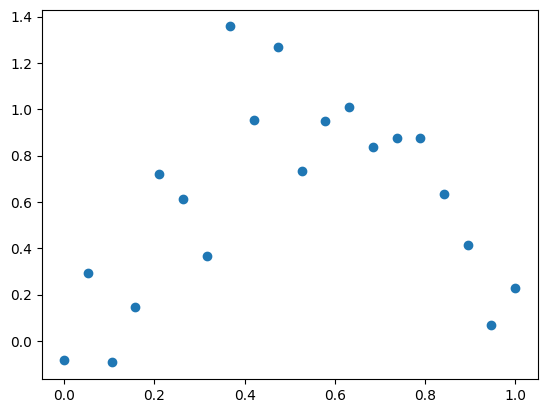

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

N = 20
noise = 0.3
x = np.linspace(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)

data_synth = pd.DataFrame({'x' : x, 'y' : y})

plt.scatter(x,y)

In [11]:
%run tools.py

degree = 9
likelihood = 'gaussian'

models = []

for i in range(degree):
    
    data_poly = pd.DataFrame({'y' : y})

    priors = []

    prior_a_mean = 0
    prior_a_sigma = 5
    prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

    priors.append(prior_a)
    
    if i > 0:
        expr = 'y ~ '
        for k in range(1,i+1):
            if k>1:
                expr = expr + '+'
            prior_param_mean = 0
            prior_param_sigma = 5
            prior_param = ['gaussian', [prior_param_mean, prior_param_sigma]]
            priors.append(prior_param)
            data_poly['x'+str(k)] = x**k
            expr = expr + 'x' + str(k)

    sigma_inf = 0.1
    sigma_sup = 5
    prior_sigma_unif = [sigma_inf, sigma_sup]
    prior_sigma = ['uniform', prior_sigma_unif]

    priors.append(prior_sigma)
    
    if i > 0:
        models.append(laplace_solution_regression(expr, data_poly, likelihood, priors))
    else:
        models.append(laplace_solution([1,1],[],data_poly['y'], likelihood, priors))   

      fun: 14.894956274492877
 hess_inv: array([[ 8.57228883e-03, -8.65017541e-06],
       [-8.65017541e-06,  4.27622836e-03]])
      jac: array([ 1.1920929e-07, -1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 5
     njev: 13
   status: 0
  success: True
        x: array([0.6082324 , 0.41418133])


/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 16.918762372570626
 hess_inv: array([[ 2.99822281e-02, -4.36869023e-02, -6.84376121e-05],
       [-4.36869023e-02,  8.74955887e-02,  9.30357583e-05],
       [-6.84376121e-05,  9.30357583e-05,  4.07371743e-03]])
      jac: array([-1.19209290e-06,  2.38418579e-07, -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 20
     njev: 28
   status: 0
  success: True
        x: array([0.45726135, 0.30206107, 0.40389096])
      fun: 7.812028247401197
 hess_inv: array([[ 1.76218529e-02, -6.89350581e-02,  5.60023266e-02,
         9.98936285e-06],
       [-6.89350581e-02,  3.89732492e-01, -3.65153967e-01,
         1.23330488e-04],
       [ 5.60023266e-02, -3.65153967e-01,  3.66869795e-01,
        -1.52098086e-04],
       [ 9.98936285e-06,  1.23330488e-04, -1.52098086e-04,
         1.28058593e-03]])
      jac: array([-1.78813934e-07, -1.78813934e-07,  0.00000000e+00, -2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 

/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 9.780441627838373
 hess_inv: array([[ 2.10335493e-02, -1.27538691e-01,  2.22116259e-01,
        -1.17099630e-01,  2.28698043e-04],
       [-1.27538691e-01,  1.29982157e+00, -2.87182457e+00,
         1.74344356e+00, -2.68961310e-03],
       [ 2.22116259e-01, -2.87182457e+00,  7.17104912e+00,
        -4.69384152e+00,  6.91504437e-03],
       [-1.17099630e-01,  1.74344356e+00, -4.69384152e+00,
         3.22219523e+00, -4.69737417e-03],
       [ 2.28698043e-04, -2.68961310e-03,  6.91504437e-03,
        -4.69737417e-03,  1.26514839e-03]])
      jac: array([-3.57627869e-07,  1.19209290e-07, -1.19209290e-07,  3.57627869e-07,
       -2.74181366e-06])
  message: 'Optimization terminated successfully.'
     nfev: 250
      nit: 29
     njev: 41
   status: 0
  success: True
        x: array([-0.10827411,  3.31857959, -1.3617213 , -1.8115074 ,  0.21605458])


/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 12.289499263833465
 hess_inv: array([[ 1.86032304e-02, -1.15499732e-01,  1.77263995e-01,
        -3.20724573e-02, -5.10141875e-02,  2.55823709e-04],
       [-1.15499732e-01,  1.21051131e+00, -2.63691322e+00,
         1.51477654e+00,  6.35789306e-02, -1.71240205e-03],
       [ 1.77263995e-01, -2.63691322e+00,  8.12884331e+00,
        -8.50796447e+00,  2.77752328e+00, -1.40736767e-03],
       [-3.20724573e-02,  1.51477654e+00, -8.50796447e+00,
         1.45201211e+01, -7.57556009e+00,  1.09818047e-02],
       [-5.10141875e-02,  6.35789306e-02,  2.77752328e+00,
        -7.57556009e+00,  4.91767245e+00, -8.32982144e-03],
       [ 2.55823709e-04, -1.71240205e-03, -1.40736767e-03,
         1.09818047e-02, -8.32982144e-03,  1.14846368e-03]])
      jac: array([-4.76837158e-07, -8.34465027e-07, -2.38418579e-07, -3.57627869e-07,
        1.19209290e-07, -6.31809235e-06])
  message: 'Optimization terminated successfully.'
     nfev: 325
      nit: 36
     njev: 46
   status: 0
  success

/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 14.678697721971258
 hess_inv: array([[ 2.10904976e-02, -1.24667776e-01,  1.84826659e-01,
        -2.96495838e-02, -6.32995158e-02,  9.43571101e-03,
         1.34424213e-04],
       [-1.24667776e-01,  1.31961226e+00, -3.01879137e+00,
         1.57941351e+00,  1.05507999e+00, -7.88301619e-01,
         4.05803337e-04],
       [ 1.84826659e-01, -3.01879137e+00,  9.79831898e+00,
        -8.76524010e+00, -1.70926699e+00,  3.51677158e+00,
        -6.85444181e-03],
       [-2.96495838e-02,  1.57941351e+00, -8.76524010e+00,
         1.42831955e+01, -6.33436137e+00, -8.30333232e-01,
         8.87119413e-03],
       [-6.32995158e-02,  1.05507999e+00, -1.70926699e+00,
        -6.33436137e+00,  1.57535812e+01, -8.75069140e+00,
         5.69217030e-03],
       [ 9.43571101e-03, -7.88301619e-01,  3.51677158e+00,
        -8.30333232e-01, -8.75069140e+00,  6.99271514e+00,
        -8.50243142e-03],
       [ 1.34424213e-04,  4.05803337e-04, -6.85444181e-03,
         8.87119413e-03,  5.69217030

/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 17.070141528224713
 hess_inv: array([[ 1.81004592e-02, -1.11329383e-01,  1.65035059e-01,
        -1.28147284e-02, -5.54665160e-02, -3.17309571e-02,
         2.68967057e-02, -4.59630602e-05],
       [-1.11329383e-01,  1.19717714e+00, -2.65916649e+00,
         1.08330668e+00,  9.69498168e-01,  1.57843321e-01,
        -6.27996024e-01,  2.71547091e-03],
       [ 1.65035059e-01, -2.65916649e+00,  8.35208333e+00,
        -6.83843496e+00, -1.41902161e+00,  9.72917488e-01,
         1.45348772e+00, -1.09965092e-02],
       [-1.28147284e-02,  1.08330668e+00, -6.83843496e+00,
         1.27302507e+01, -6.74557346e+00, -1.82411659e+00,
         1.55658561e+00,  6.69195272e-03],
       [-5.54665160e-02,  9.69498168e-01, -1.41902161e+00,
        -6.74557346e+00,  1.52643231e+01, -6.83431710e+00,
        -1.24984640e+00,  7.34085641e-03],
       [-3.17309571e-02,  1.57843321e-01,  9.72917488e-01,
        -1.82411659e+00, -6.83431710e+00,  1.55963022e+01,
        -8.04389874e+00,  3.52402217

/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 19.51273065480671
 hess_inv: array([[ 1.89365147e-02, -1.19458979e-01,  1.84436570e-01,
        -1.58489330e-02, -7.64260194e-02, -3.06503779e-02,
         8.06784629e-03,  3.05877571e-02,  2.01551123e-04],
       [-1.19458979e-01,  1.32666265e+00, -2.99788317e+00,
         9.99248040e-01,  1.46012682e+00,  2.90860054e-01,
        -5.62918293e-01, -4.01166794e-01, -9.56973248e-04],
       [ 1.84436570e-01, -2.99788317e+00,  9.11097343e+00,
        -5.75448172e+00, -4.39825769e+00,  8.46411606e-01,
         3.59400854e+00, -5.36690650e-01, -9.95274904e-04],
       [-1.58489330e-02,  9.99248040e-01, -5.75448172e+00,
         8.18785375e+00,  6.40217144e-01, -2.73740106e+00,
        -6.30962510e+00,  4.96309816e+00,  4.14866132e-03],
       [-7.64260194e-02,  1.46012682e+00, -4.39825769e+00,
         6.40217144e-01,  7.79109175e+00, -6.42659616e+00,
         3.02592128e+00, -2.08996079e+00,  1.01258045e-03],
       [-3.06503779e-02,  2.90860054e-01,  8.46411606e-01,
        -2.

/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 21.99506865126547
 hess_inv: array([[ 2.18078706e-02, -1.42147159e-01,  2.03461748e-01,
         1.66696611e-02, -6.33465606e-02, -6.54405010e-02,
        -2.58999355e-02,  1.31141286e-02,  4.20478377e-02,
        -1.26033313e-04],
       [-1.42147159e-01,  1.50358634e+00, -3.10862448e+00,
         6.53249772e-01,  1.39724587e+00,  6.03496803e-01,
        -1.29501511e-01, -4.63753869e-01, -3.28590813e-01,
         2.09387680e-03],
       [ 2.03461748e-01, -3.10862448e+00,  9.00397834e+00,
        -4.92801274e+00, -4.81595564e+00,  2.11026108e-01,
         2.66573694e+00,  2.10510053e+00, -1.27133492e+00,
        -8.55567096e-03],
       [ 1.66696611e-02,  6.53249772e-01, -4.92801274e+00,
         7.03959677e+00,  1.89599993e+00, -1.99999678e+00,
        -5.43581708e+00, -2.60413865e+00,  5.36107365e+00,
         6.77850597e-03],
       [-6.33465606e-02,  1.39724587e+00, -4.81595564e+00,
         1.89599993e+00,  8.29397912e+00, -8.20993056e+00,
         5.79813795e-01,  2.23

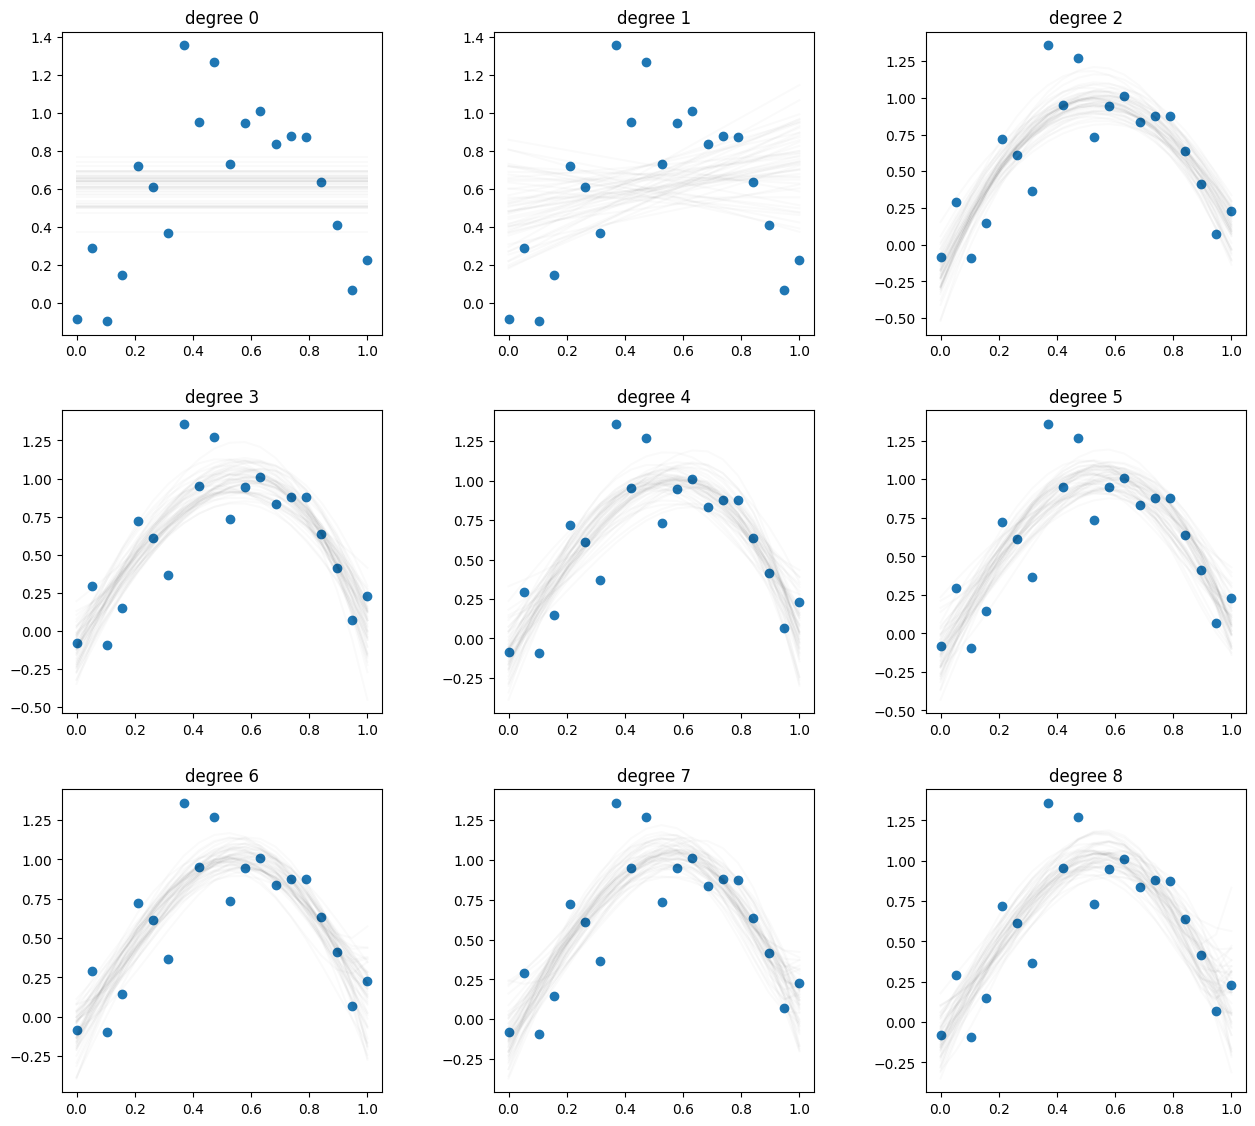

In [12]:
N_samp = 50

for i in range(degree):
    plt.subplot(int(float(degree)/3)+1,3,i+1)

    samples = post_sample_Laplace(models[i], N_samp)
    for l in range(N_samp):
        if i>0:
            pred = np.sum([x**k * samples[l,k] for k in range(i+1)],0)
        else:
            pred = x**0 * samples[l,0]
        plt.plot(x,pred, color = 'black', alpha = 0.02)
    
    plt.scatter(x,y)
    plt.title('degree ' + str(i))    
    plt.subplots_adjust(top=3, bottom=0.001, left=0.10, right=1.95, hspace=0.25,wspace=0.35)

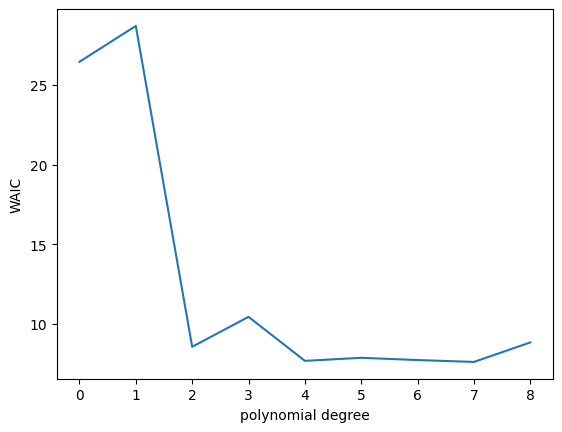

In [13]:
import scipy

WAIC = []

N_samp = 1000

for i in range(degree):
    lppd = 0
    p_waic = 0
    samples = post_sample_Laplace(models[i], N_samp)
    for k,target in enumerate(y):
        log_p = []
        for l in range(len(samples)):
            if i>0:
                pred = np.sum([x[k]**j * samples[l,j] for j in range(i+1)],0)
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
            else:
                pred = x[k]**0 * samples[l,0]
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
    
        lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
        p_waic += np.var(log_p)
    
#    print(lppd, p_waic)
    
    WAIC.append(-2*( lppd - p_waic))   

plt.plot(range(degree),WAIC)
plt.xticks(range(degree))
plt.xlabel('polynomial degree')
plt.ylabel('WAIC')
plt.show()

**Exercise.** Compare a polynomial model of order 1 to the polynomial model of order 3 with Stan

In [14]:
import stan
import nest_asyncio as asyncio
import nest_asyncio
nest_asyncio.apply()

In [15]:
poly_model_1_code = """
data {
    int<lower=1> N;
    vector[N] y;
    vector[N] x1;
}
parameters {
    real a;
    real b1;
    real<lower=1e-4> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = a + b1 * x1 ; 
}
model {
    sigma ~ cauchy(0,4);
    b1 ~ normal(0, 3);
    a ~ normal(0, 2);
    y ~ normal(mu, sigma);
}
"""


In [16]:
data_poly1 = dict(x1 = x, y = y, N=N)

In [17]:
seed = 123

posterior = stan.build(poly_model_1_code, data=data_poly1, random_seed=seed)


Building: found in cache, done.


In [23]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.T)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!


draws              0         1          2          3         4         5     \
parameters                                                                    
lp__           3.191065  6.190058   5.659234   4.858809  6.138919  6.190058   
accept_stat__  0.922377  0.859867   0.866515   0.997683  0.959060  0.555493   
stepsize__     0.408372  0.303422   0.325759   0.313441  0.408372  0.303422   
treedepth__    3.000000  2.000000   3.000000   4.000000  2.000000  1.000000   
n_leapfrog__   7.000000  3.000000  15.000000  15.000000  3.000000  3.000000   
divergent__    0.000000  0.000000   0.000000   0.000000  0.000000  0.000000   
energy__       0.195398 -5.046514  -4.690174  -3.862649 -2.867530 -3.209469   
a              0.257279  0.476548   0.282668   0.327360  0.190606  0.476548   
b1             1.011802  0.449461   0.372255   0.568646  0.686387  0.449461   
sigma          0.421034  0.372316   0.516160   0.604972  0.441893  0.372316   
mu.1           0.257279  0.476548   0.282668   0.327

# Bayesian classification


In simple terms, classification implies estimating the probability of an observation to belong to a certain class, such as positive or negative, or 0 or 1. The classical model for estimating such as probability is the Binomial model:

$$ p(y) \sim Binomial(n,p), $$

where $y$ is the number of positive cases, $n$ is the total number of trials, and $p$ is the probability of a case being positive.  

As for linear regression our likelihood model was Gaussian, here our likelihood model will be Binomial. In linear regression, we were parameterizing the mean of the Gaussian model as a linear combination of the predictors:

$$ y_i \sim \mathcal{N}(\mu_i, \sigma),$$
$$ \mu_i = a + b x_i.$$

In the Binomial model, we parameterize the probability $p$ as a linear combination of the predictors:

$$y_i \sim Binomial(n, p_i)$$
$$f(p_i) = a + b x_i.$$

There are some issues to take into account. Since the probability $p_i$ must be greater than 0 and lower than 1, by parameterizing it directly with a linear model we will incour into problems, as this would not guarantee that the linear combination is bounded in the interval $[0,1]$. Therefore we need to *link* the probability $p_i$ to the linear model through some clever parameterization, called *link function*. A classical link function is called *logit* function, and is defined with respect to the log-odds:

$$f(p_i) = logit(p_i) = \log(odds(p_i)) = \log(\frac{p_i}{1-p_i}).$$

The odds is the ratio between probability of the outcome being positive and probability of being negative. Therefore is goes from 0 ($p_i=0$) to infinity ($p_i=1$). By taking the log, we transform the odds into a quantity that can range from $-\infty$ to $\infty$, a perfect variable to be described by a linear model.
We rewrite our Binomial link function:

$$ \log(\frac{p_i}{1-p_i}) = a + b x_i,$$

and we derive:

$$\frac{p_i}{1-p_i} = \exp(a + b x_i),$$
$$p_i = \frac{\exp(a + b x_i)}{1 + \exp(a + b x_i)}. $$




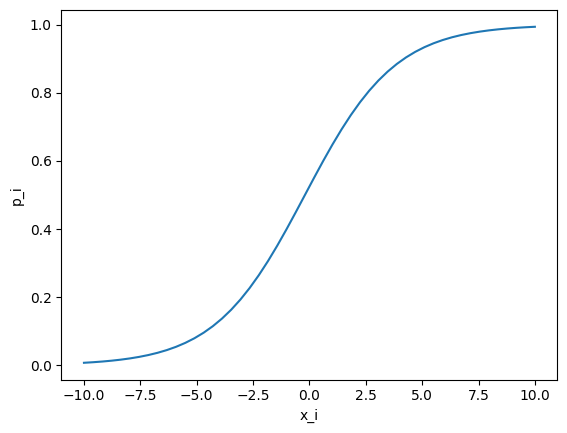

In [33]:
a = 0.1
b = 0.5

x_i = np.linspace(-10,10)

p_i = np.exp(a+b*x_i)/(1+np.exp(a+b*x_i))

plt.plot(x_i,p_i)
plt.xlabel('x_i')
plt.ylabel('p_i')
plt.show()



We recognize that the link function creates a non-linear association between $x_i$ and $p_i$, where $p_i$ is indeed bounded by 0 and 1. Importantly, although the association is linear, a unit increase in $x$ does not correspond anymore to a unit increase in the output. The magnitude of the association depends on the value of $x$ itself, and is greater in correspondence of the maximum slope of the curve. 

This kind of model is called *logistic regression*. 

## Example: Logistic regression for predicting Alzheimer's disease

In [34]:
data = pd.read_csv('adni_data')
pd.set_option('mode.chained_assignment', None) 

data_ct_ad = data.query('DX == 1 | DX == 3') 
data_ct_ad['DX'] = data_ct_ad['DX'].map({1: 0, 3: 1})

data_ct_ad['norm_brain'] = data_ct_ad['WholeBrain.bl']/data_ct_ad['ICV']
data_ct_ad['norm_brain'] = (data_ct_ad['norm_brain'] - np.mean(data_ct_ad['norm_brain']))/np.std(data_ct_ad['norm_brain'])
data_ct_ad.dropna(inplace = True)


print(data_ct_ad[:5])

   RID  APOE4  DX   AGE  WholeBrain.bl           ICV  norm_brain
0    2    0.0   0  74.3      1229738.0  1.984657e+06   -0.907716
1    3    1.0   1  81.3      1129834.0  1.920691e+06   -1.508346
3    5    0.0   0  73.7      1116633.0  1.640766e+06    0.258629
5    7    1.0   1  75.4       875798.0  1.353519e+06   -0.382669
6    8    0.0   0  84.5       948684.0  1.396068e+06    0.239182


In [35]:
binomial_model_code = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
}
parameters {
  real a;
  real b;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i])/(1 + exp(a + b * x[i])); 
    }
}
model {
  b ~ normal(0, 3);
  a ~ normal(0, 3);
  y ~ binomial(1, p_i);
}
"""


In [36]:
data_to_stan = dict(x = np.array(data_ct_ad['norm_brain']), y = np.array(data_ct_ad['DX']), N = len(data_ct_ad['DX']))

seed = 123

posterior = stan.build(binomial_model_code, data=data_to_stan, random_seed=seed)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s


clang-14: warning: -Wl,-export_dynamic: 'linker' input unused [-Wunused-command-line-argument]


Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/mlore

Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err.hpp:50:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err/hm

Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/re

Building: 5.2s
Building: 5.3s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpsta

Building: 6.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpsta

Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/mod

Building: 7.0s
Building: 7.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:153:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index k = 0; k < N; ++k) {
                           ~ ^ ~
/Users/mlorenzi/miniconda3/envs/pymc3/li

Building: 7.2s
Building: 7.3s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.8s
Building: 9.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, v

Building: 10.0s
Building: 10.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:87:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/double_exponential_cdf.hpp:77:10: warning: unused variable 'N' [-Wunused-variable]
  size_t N = max_size(y, mu, sigma);
         ^
In file inclu

Building: 10.2s
Building: 10.3s
Building: 10.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/includ

Building: 11.2s
Building: 11.3s
Building: 11.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:17:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/indexing.hpp:6:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/indexing/assign.hpp:270:21: warning: comparison of integers of different signs: 'int' and 'std::vector<int>::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/indexing/assign.hpp:538:21: warning: comparison of integers of different signs: 'int' and 'std::vector<int>::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < col_idx.ns_.siz

Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_division.hpp:14:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan

Building: 11.9s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/

Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/zbgvn7zs/model_zbgvn7zs.cpp:2:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:58:
/Users/mlorenzi/miniconda3/envs/pymc3/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:13: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
static void set_zero_all_adjoints() {
            ^
In file included from /Users/mlorenzi/Library/

Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s


56 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s


Building: 19.2s, done.


In [38]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.T[:10])

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000349 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.49 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: binomial_lpmf: Probability parameter[1] is nan, but must be in the interval [0, 1] (in '/var/folders/y1/mqwffwx97cqcz6jq_cr4twmc0000gn/T/httpstan_fffvlj5r/model_zbgvn7zs.stan', line 20, column 2 to column 23)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000341 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.41 seconds.
  Adjust your expectations accordingly!
  Informational

draws                0           1           2           3           4     \
parameters                                                                  
lp__          -461.117621 -459.641490 -459.249790 -461.513845 -461.270696   
accept_stat__    0.693197    0.863036    0.999480    0.961889    0.967200   
stepsize__       0.841497    0.859717    0.886649    0.766290    0.841497   
treedepth__      1.000000    2.000000    2.000000    2.000000    2.000000   
n_leapfrog__     3.000000    3.000000    3.000000    7.000000    3.000000   
divergent__      0.000000    0.000000    0.000000    0.000000    0.000000   
energy__       461.323969  462.655106  459.901250  461.518662  462.849375   
a               -0.613801   -0.511487   -0.583957   -0.408500   -0.420441   
b               -0.978167   -1.159224   -1.140530   -1.070609   -1.061018   
p_i.1            0.568098    0.631989    0.610953    0.637218    0.632431   

draws                5           6           7           8           9     

In [39]:
est_a = fit['a'][0]
quantiles_a = np.quantile(est_a, [0.05, 0.5, 0.95])

est_b = fit['b'][0]
quantiles_b = np.quantile(est_b, [0.05, 0.5, 0.95])

logistic_a_50 = np.exp(quantiles_a[1])/(1 + np.exp(quantiles_a[1]))
logistic_a_5 = np.exp(quantiles_a[0])/(1 + np.exp(quantiles_a[0]))
logistic_a_95 = np.exp(quantiles_a[2])/(1 + np.exp(quantiles_a[2]))

print('Baseline probability of disease: \n')
print('5%  :', logistic_a_5)
print('50% :', logistic_a_50)
print('95% :', logistic_a_95)


logistic_b_95 = np.exp(quantiles_a[0] - quantiles_b[0])/(1 + np.exp(quantiles_a[0] - quantiles_b[0]))
logistic_b_50 = np.exp(quantiles_a[0] - quantiles_b[1])/(1 + np.exp(quantiles_a[0] - quantiles_b[1]))
logistic_b_5 = np.exp(quantiles_a[0] - quantiles_b[2])/(1 + np.exp(quantiles_a[0] - quantiles_b[2]))


print('Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): \n')
print('5%  :', logistic_b_5)
print('50% :', logistic_b_50)
print('95% :', logistic_b_95)

Baseline probability of disease: 

5%  : 0.3267801045606664
50% : 0.35847916405675434
95% : 0.38947484583701925
Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): 

5%  : 0.5663186458020378
50% : 0.6052598269169269
95% : 0.644341141875209


In [40]:
p_i = fit['p_i']
print(p_i.shape)

(826, 4000)


In [ ]:

lppd = []
pwaic = []
for i in range(len(data_ct_ad)):
    id_log_lik = []
    for k in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[i], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic = -2 * (np.sum(lppd) -np.sum(pwaic))

What happens when we include another predictor, for example the presence of the genetic mutation APOE4?

In [ ]:
binomial_model_code_2 = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
  real x_g[N];
}
parameters {
  real a;
  real b;
  real c;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i] + c * x_g[i])/(1 + exp(a + b * x[i] + c * x_g[i])); 
    }
}
model {
  c ~ normal(0, 3);
  b ~ normal(0, 3);
  a ~ normal(0, 3);
  y ~ binomial(1, p_i);
}
"""

In [ ]:
data_to_stan = dict(x = np.array(data_ct_ad['norm_brain']), 
                    x_g = np.array(data_ct_ad['APOE4']),
                    y = np.array(data_ct_ad['DX']), 
                    N = len(data_ct_ad['DX']))

seed = 123

posterior = stan.build(binomial_model_code_2, data=data_to_stan, random_seed=seed)

In [ ]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.describe().T[:10])

Is this model better fitting the diagnosis than the previous one?

In [ ]:
p_i = fit['p_i']

lppd = []
pwaic = []
for i in range(len(data_ct_ad)):
    id_log_lik = []
    for k in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[i], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic_apoe = -2 * (np.sum(lppd) -np.sum(pwaic))

In [ ]:
print(waic, waic_apoe)